In [1]:
'''
Diabetes : 
deficiency in insulin
hormone produced by a gland pancreas:results in high blood sugar

2 types:
type 1 :
Pancreas produces no or low insulin
type 2 :
Body cells respond poorly or do not absorb enough sugar

our focus : type : 2
out dataset also about that
how it diagnosed :
Test                    Value of Diagnosis
fasting plasma glucose  >=126 mg/dL
oral glucose tolerance  >=200 mh/dL
Glucated Hemoglobin     >=6.5 %

The data consist of medical information, laboratory analysis… etc. 
The data that have been entered initially into the system are: No. of Patient, 
Sugar Level Blood, Age, Gender, Creatinine ratio(Cr), Body Mass Index (BMI), Urea,
Cholesterol (Chol), Fasting lipid profile, including total, LDL, VLDL, Triglycerides(TG) 
and HDL Cholesterol , HBA1C, Class 
(the patient's diabetes disease class may be Diabetic, Non-Diabetic, or Predict-Diabetic).
'''

"\nDiabetes : \ndeficiency in insulin\nhormone produced by a gland pancreas:results in high blood sugar\n\n2 types:\ntype 1 :\nPancreas produces no or low insulin\ntype 2 :\nBody cells respond poorly or do not absorb enough sugar\n\nour focus : type : 2\nout dataset also about that\nhow it diagnosed :\nTest                    Value of Diagnosis\nfasting plasma glucose  >=126 mg/dL\noral glucose tolerance  >=200 mh/dL\nGlucated Hemoglobin     >=6.5 %\n\nThe data consist of medical information, laboratory analysis… etc. \nThe data that have been entered initially into the system are: No. of Patient, \nSugar Level Blood, Age, Gender, Creatinine ratio(Cr), Body Mass Index (BMI), Urea,\nCholesterol (Chol), Fasting lipid profile, including total, LDL, VLDL, Triglycerides(TG) \nand HDL Cholesterol , HBA1C, Class \n(the patient's diabetes disease class may be Diabetic, Non-Diabetic, or Predict-Diabetic).\n"

#### 1. Initial Setup & Inspection:

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('../data/Dataset_of_Diabetes.csv')
df

,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,502,17975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
1,735,34221,M,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,N
2,420,47975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
3,680,87656,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
4,504,34223,M,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,200,454317,M,71,11.0,97,7.0,7.5,1.7,1.2,1.8,0.6,30.0,Y
996,671,876534,M,31,3.0,60,12.3,4.1,2.2,0.7,2.4,15.4,37.2,Y
997,669,87654,M,30,7.1,81,6.7,4.1,1.1,1.2,2.4,8.1,27.4,Y
998,99,24004,M,38,5.8,59,6.7,5.3,2.0,1.6,2.9,14.0,40.5,Y


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         1000 non-null   int64  
 1   No_Pation  1000 non-null   int64  
 2   Gender     1000 non-null   object 
 3   AGE        1000 non-null   int64  
 4   Urea       1000 non-null   float64
 5   Cr         1000 non-null   int64  
 6   HbA1c      1000 non-null   float64
 7   Chol       1000 non-null   float64
 8   TG         1000 non-null   float64
 9   HDL        1000 non-null   float64
 10  LDL        1000 non-null   float64
 11  VLDL       1000 non-null   float64
 12  BMI        1000 non-null   float64
 13  CLASS      1000 non-null   object 
dtypes: float64(8), int64(4), object(2)
memory usage: 109.5+ KB


In [5]:
df.describe()

,ID,No_Pation,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI
count,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,340.500000,2.705514e+05,53.528000,5.124743,68.943000,8.281160,4.862820,2.349610,1.204750,2.609790,1.854700,29.578020
std,240.397673,3.380758e+06,8.799241,2.935165,59.984747,2.534003,1.301738,1.401176,0.660414,1.115102,3.663599,4.962388
min,1.000000,1.230000e+02,20.000000,0.500000,6.000000,0.900000,0.000000,0.300000,0.200000,0.300000,0.100000,19.000000
25%,125.750000,2.406375e+04,51.000000,3.700000,48.000000,6.500000,4.000000,1.500000,0.900000,1.800000,0.700000,26.000000
50%,300.500000,3.439550e+04,55.000000,4.600000,60.000000,8.000000,4.800000,2.000000,1.100000,2.500000,0.900000,30.000000
75%,550.250000,4.538425e+04,59.000000,5.700000,73.000000,10.200000,5.600000,2.900000,1.300000,3.300000,1.500000,33.000000
max,800.000000,7.543566e+07,79.000000,38.900000,800.000000,16.000000,10.300000,13.800000,9.900000,9.900000,35.000000,47.750000


### 2. Data Cleaning:

In [6]:
#Drop Irrelevant Columns:
df = df.drop(['ID','No_Pation'],axis=1)
df

,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
1,M,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,N
2,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
3,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
4,M,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,N
...,...,...,...,...,...,...,...,...,...,...,...,...
995,M,71,11.0,97,7.0,7.5,1.7,1.2,1.8,0.6,30.0,Y
996,M,31,3.0,60,12.3,4.1,2.2,0.7,2.4,15.4,37.2,Y
997,M,30,7.1,81,6.7,4.1,1.1,1.2,2.4,8.1,27.4,Y
998,M,38,5.8,59,6.7,5.3,2.0,1.6,2.9,14.0,40.5,Y


In [7]:
#Handling missing values
df.isnull().sum()


Gender    0
AGE       0
Urea      0
Cr        0
HbA1c     0
Chol      0
TG        0
HDL       0
LDL       0
VLDL      0
BMI       0
CLASS     0
dtype: int64

In [8]:
#Check for Duplicates: 
df.duplicated().sum()

np.int64(169)

##### Handle Inconsistent Values:

In [9]:
df['Gender'].value_counts()


Gender
M    565
F    434
f      1
Name: count, dtype: int64

In [10]:
df['Gender'] =df['Gender'].apply(str.upper)
print(df['Gender'].value_counts())
# df['Gender'].value_counts().plot(kind='bar')

Gender
M    565
F    435
Name: count, dtype: int64


In [11]:
df['CLASS'].value_counts()

CLASS
Y     840
N     102
P      53
Y       4
N       1
Name: count, dtype: int64

In [12]:
df['CLASS']=df['CLASS'].str.replace(' ','')

df['CLASS'].value_counts()

CLASS
Y    844
N    103
P     53
Name: count, dtype: int64

In [14]:
a=df.drop(['CLASS','Gender'],axis=1)
a.corr()


,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI
AGE,1.000000,0.105092,0.054941,0.379136,0.036649,0.148204,-0.020038,0.016105,-0.087903,0.375956
Urea,0.105092,1.000000,0.624134,-0.023603,0.001852,0.040980,-0.036994,-0.007301,-0.011191,0.045618
Cr,0.054941,0.624134,1.000000,-0.037412,-0.007097,0.056579,-0.023804,0.039479,0.009615,0.054746
HbA1c,0.379136,-0.023603,-0.037412,1.000000,0.177489,0.218556,0.028933,0.011057,0.073462,0.413350
Chol,0.036649,0.001852,-0.007097,0.177489,1.000000,0.321789,0.103814,0.416665,0.076294,0.013678
TG,0.148204,0.040980,0.056579,0.218556,0.321789,1.000000,-0.083001,0.015378,0.144570,0.110757
HDL,-0.020038,-0.036994,-0.023804,0.028933,0.103814,-0.083001,1.000000,-0.142079,-0.059275,0.072409
LDL,0.016105,-0.007301,0.039479,0.011057,0.416665,0.015378,-0.142079,1.000000,0.062795,-0.067322
VLDL,-0.087903,-0.011191,0.009615,0.073462,0.076294,0.144570,-0.059275,0.062795,1.000000,0.198133
BMI,0.375956,0.045618,0.054746,0.413350,0.013678,0.110757,0.072409,-0.067322,0.198133,1.000000


### 3. Exploratory Data Analysis (EDA):

#### Target Variable Analysis:

<Axes: xlabel='CLASS', ylabel='count'>

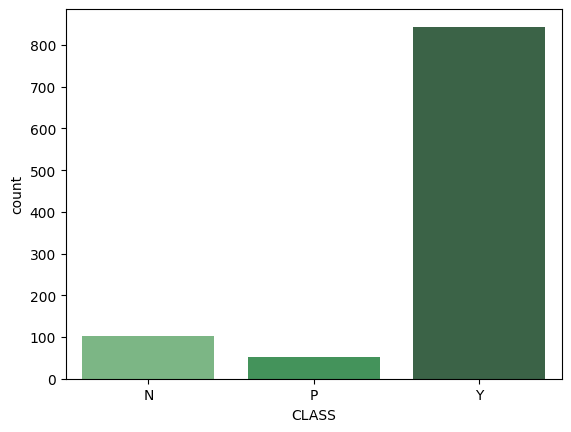

In [15]:
sns.countplot(x="CLASS",
data=df,
palette="Greens_d")

##### Observation : Here 'Y'(Diabetic)  is the Dominant Class

#### Univariate Analysis (Analyzing single features):

In [16]:
numerical_columns = df.select_dtypes(exclude='object').columns
print(numerical_columns)
categorical_columns=df.select_dtypes(include='object').columns
categorical_columns

Index(['AGE', 'Urea', 'Cr', 'HbA1c', 'Chol', 'TG', 'HDL', 'LDL', 'VLDL',
       'BMI'],
      dtype='object')


Index(['Gender', 'CLASS'], dtype='object')

In [17]:
# sns.pairplot(data=df,kind='hist')

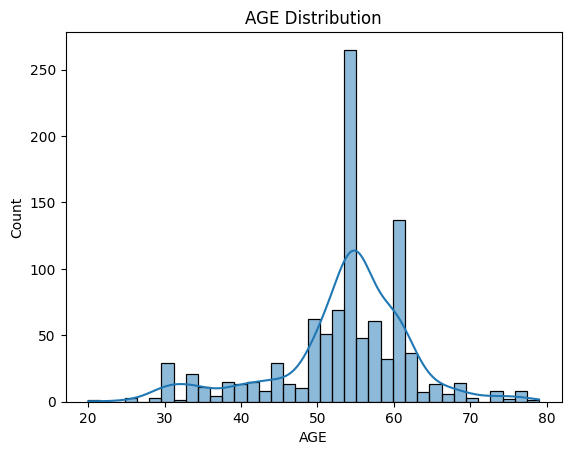

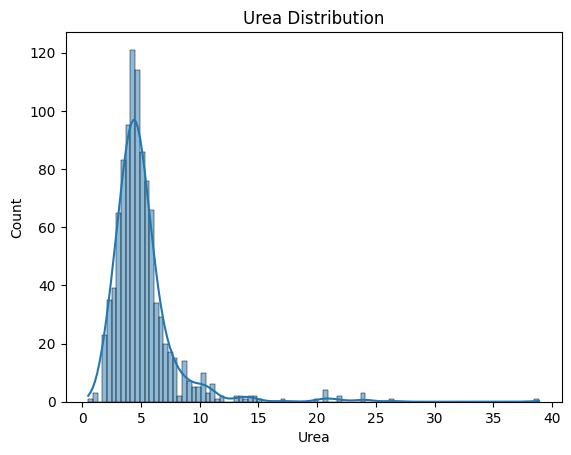

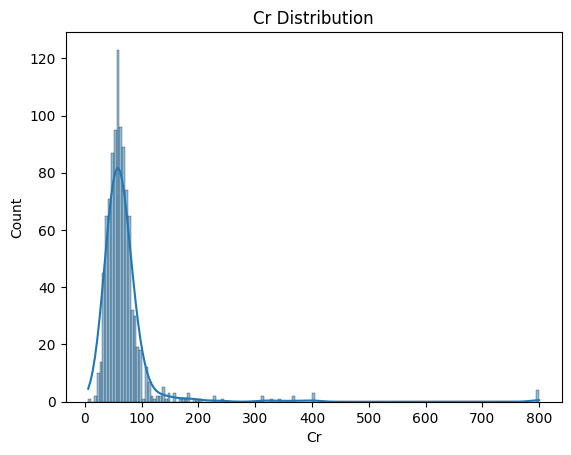

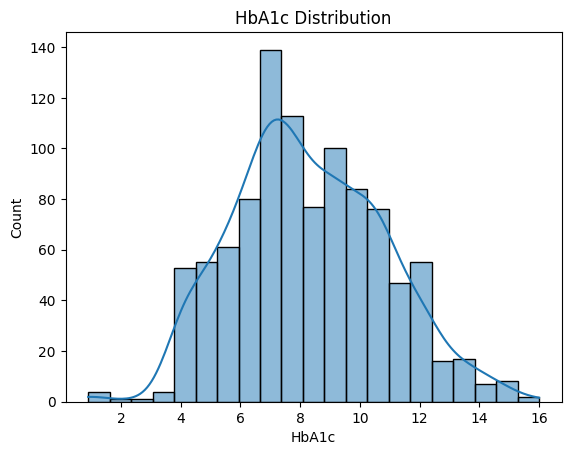

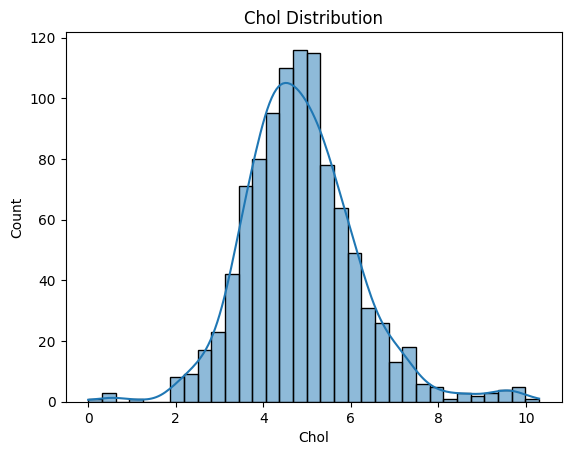

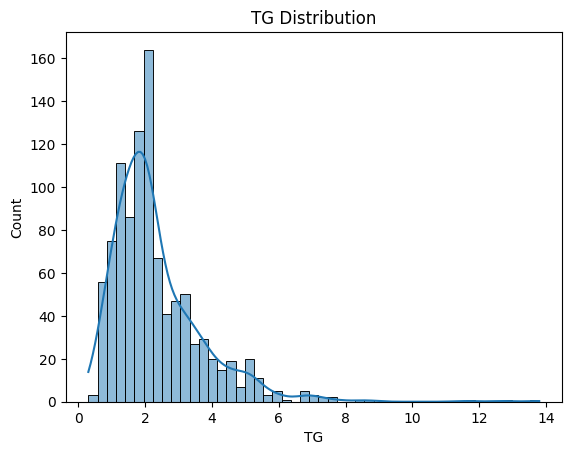

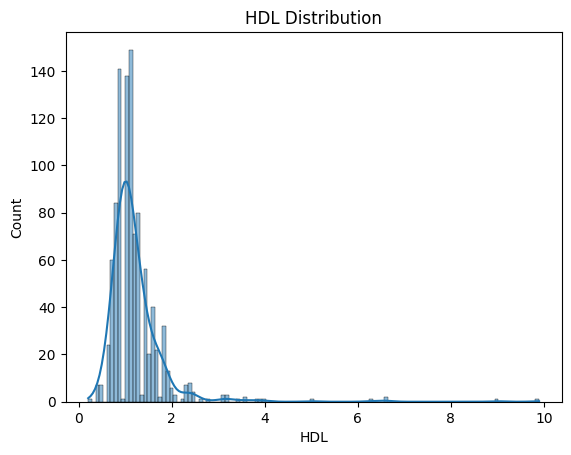

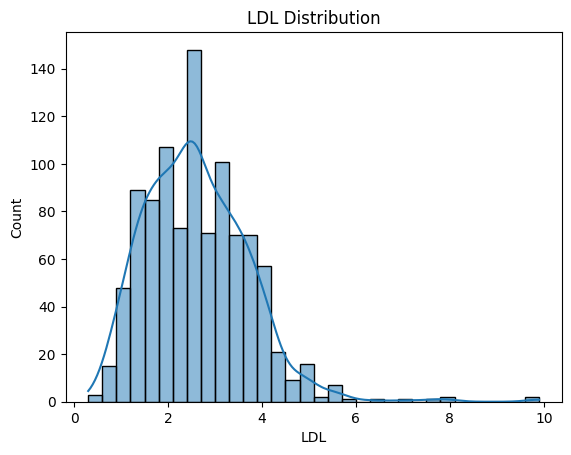

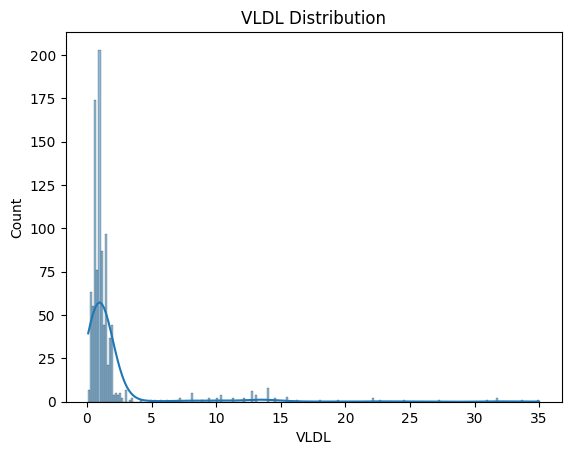

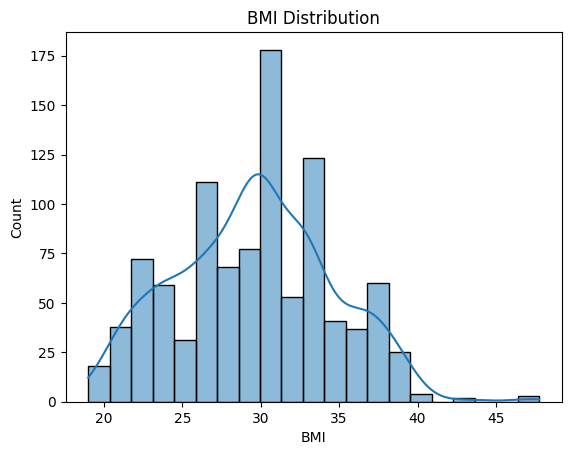

In [18]:
for i in numerical_columns:
    sns.histplot(data=df, x=i,  kde=True, multiple='stack')  # or 'dodge'
    plt.title(f'{i} Distribution'.format(i))
    plt.show()

<Axes: >

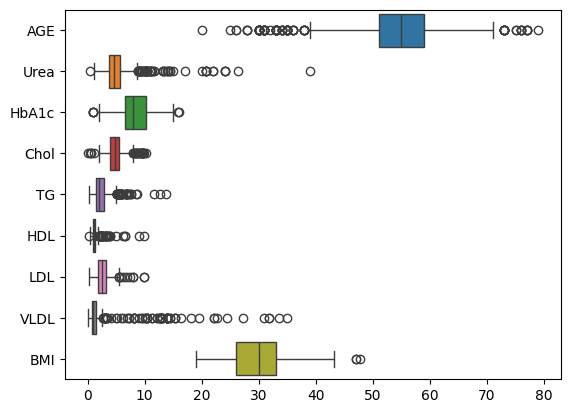

In [ ]:
# sns.boxplot(data=df,orient="h")
sns.boxplot(data=df.drop(['Cr'],axis=1),orient="h")
#Cr is too high among all ,so other are not showing the boxplot in good manner ,
#so we drop that column and do the boxplot

#### Bivariate Analysis (Analyzing features against the target CLASS):


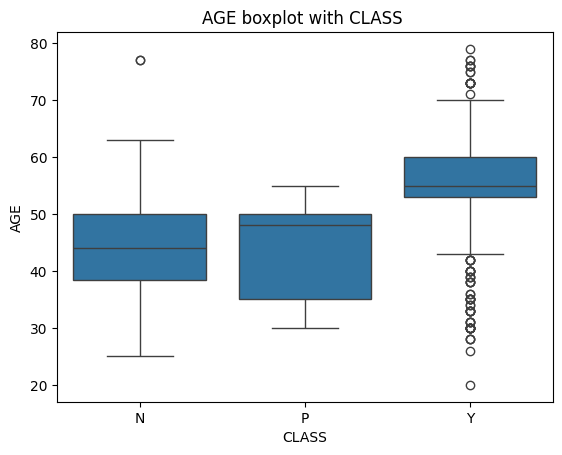

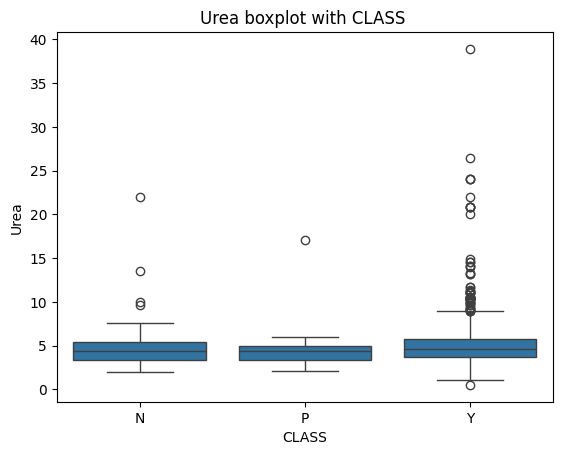

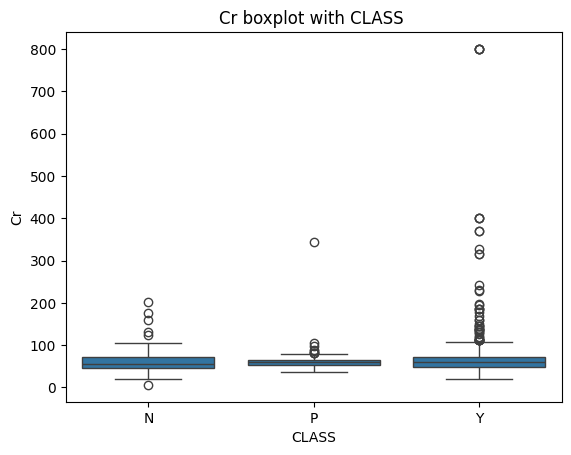

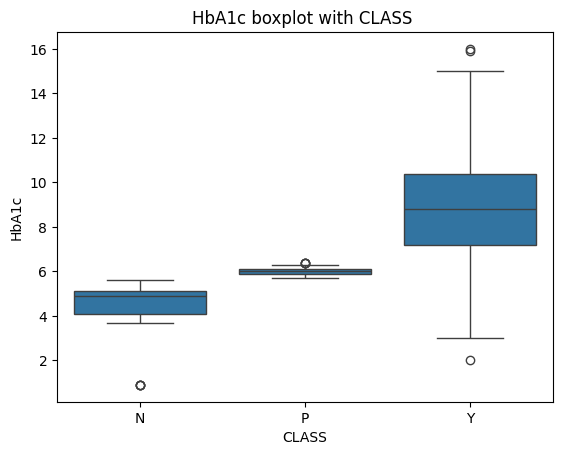

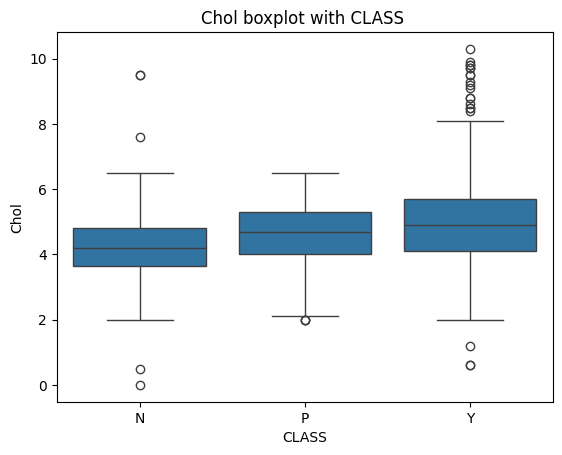

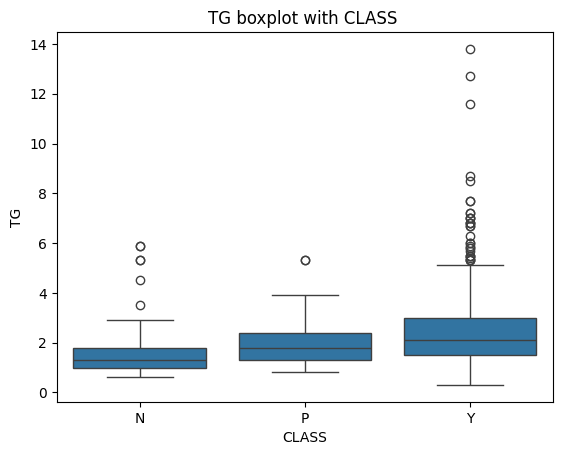

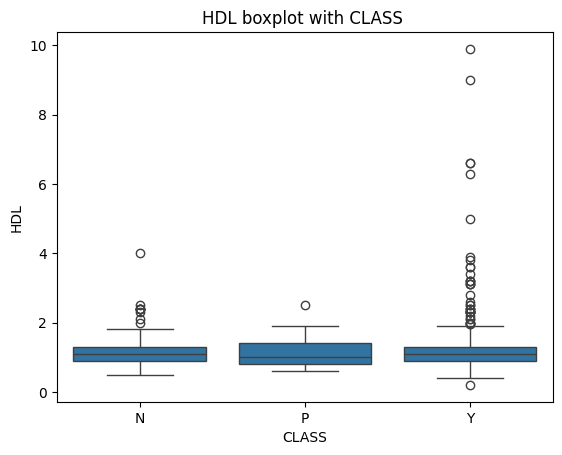

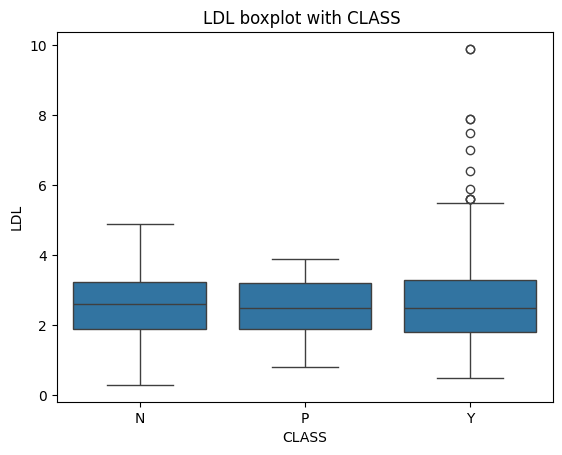

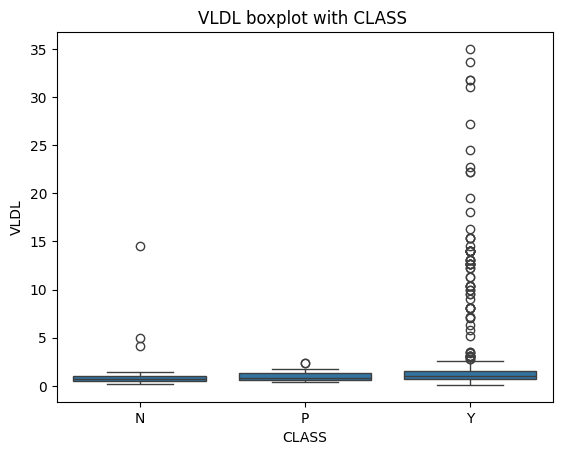

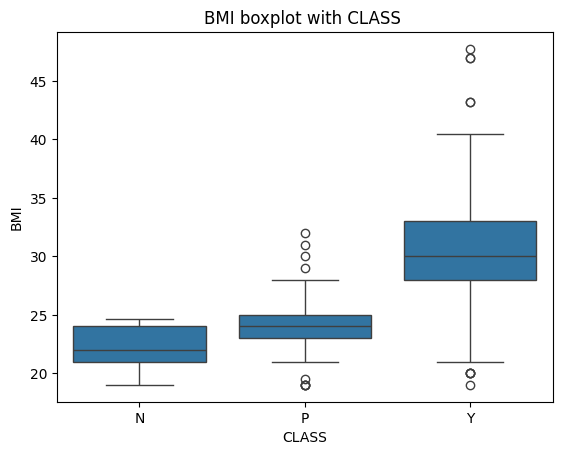

In [28]:
a=['HbA1c', 'AGE', 'BMI', 'Chol']
for i in numerical_columns:
    sns.boxplot(x='CLASS', y=i, data=df)
    plt.title(f'{i} boxplot with CLASS '.format(i))
    plt.show()

In [ ]:
#Get the average HbA1c for each class
print(df.groupby('CLASS')['HbA1c'].describe())

       count      mean       std  min  25%  50%   75%   max
CLASS                                                      
N      103.0  4.560194  0.922203  0.9  4.1  4.9   5.1   5.6
P       53.0  6.003774  0.188069  5.7  5.9  6.0   6.1   6.4
Y      844.0  8.878270  2.264865  2.0  7.2  8.8  10.4  16.0


<Axes: xlabel='Gender', ylabel='count'>

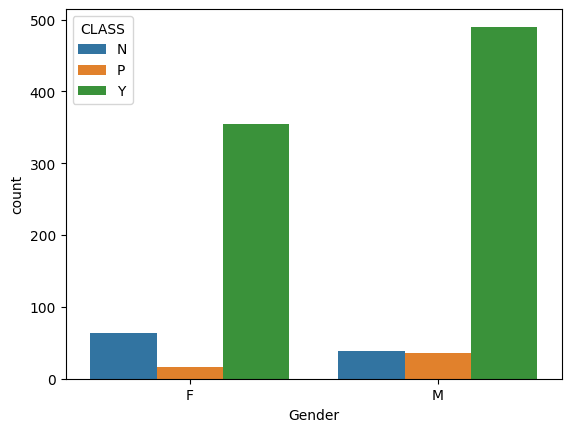

In [22]:
#Gender vs CLASS
sns.countplot(x="Gender",hue='CLASS',data=df)

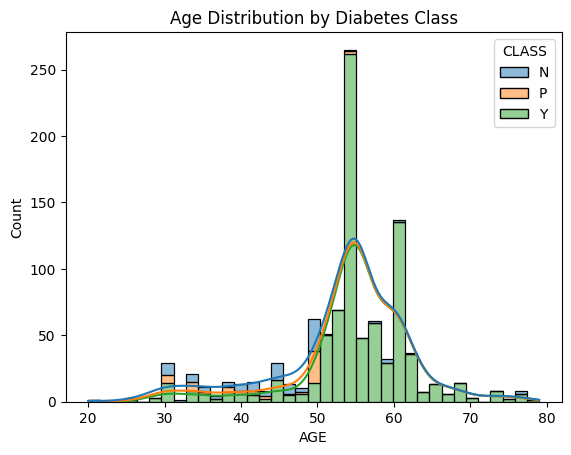

In [24]:
sns.histplot(data=df, x='AGE', hue='CLASS', kde=True, multiple='stack')  # or 'dodge'
plt.title('Age Distribution by Diabetes Class')
plt.show()


#### Correlation Analysis:

In [25]:
df

,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
1,M,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,N
2,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
3,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
4,M,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,N
...,...,...,...,...,...,...,...,...,...,...,...,...
995,M,71,11.0,97,7.0,7.5,1.7,1.2,1.8,0.6,30.0,Y
996,M,31,3.0,60,12.3,4.1,2.2,0.7,2.4,15.4,37.2,Y
997,M,30,7.1,81,6.7,4.1,1.1,1.2,2.4,8.1,27.4,Y
998,M,38,5.8,59,6.7,5.3,2.0,1.6,2.9,14.0,40.5,Y


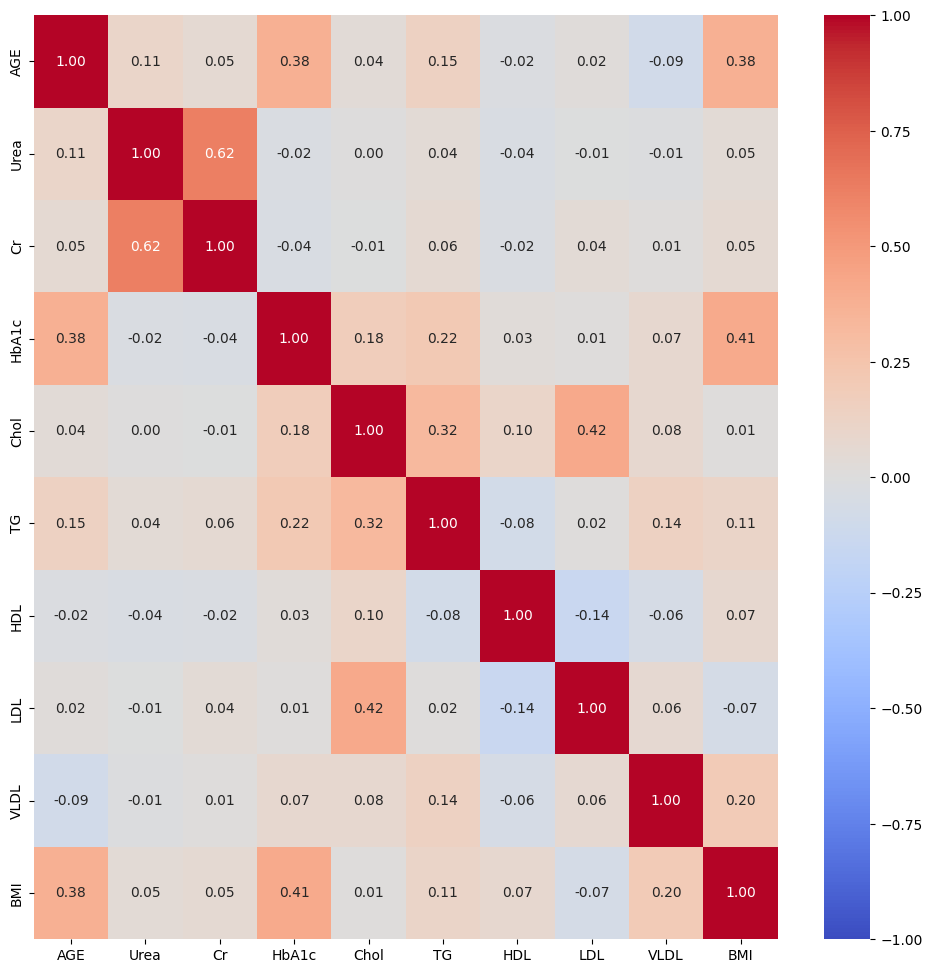

In [26]:
a=df.iloc[:,1:-1]

plt.figure(figsize=(12,12))
sns.heatmap(a.corr(), annot=True, cmap='coolwarm', fmt=".2f", center=0, vmin=-1, vmax=1)#mask=abs(corr) < 0.4
plt.show()

##### Observation:
Urea and Cr (Creatinine) show a strong positive correlation (0.62), which is medically expected. HbA1c and BMI also have a moderate positive correlation with each other.


In [27]:
df.to_csv('../data/cleaned_diabetes_data.csv', index=False)    